# Install Requirements

In [ ]:
!pip install transformers datasets

# Corpus and Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from datasets import load_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read corpus from drive

In [ ]:
path = "/content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean"
tsv_files = glob.glob(os.path.join(path, "*.tsv"))
DF = pd.DataFrame()

for f in tsv_files:
    df = pd.read_table(f, usecols=["Sentence", "Eno.", "Event", "Bel(A)", "Bel(B)", "CG(A)", "CG(B)"])
    DF = pd.concat([DF, df], ignore_index=True)
    print(f"File name: {f} and Length of events: {len(df)}")

File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/1_Train_4245_Magda_230613.tsv and Length of events: 331
File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/2_Train_4248_PlatinumMagdaFULL_230615.tsv and Length of events: 436
File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/3_Train_4310_PlatinumMagda_230615.tsv and Length of events: 584
File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/4_Test_4431_Magda_230615.tsv and Length of events: 389


In [ ]:
DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",CT+ 1.1,CT+ 1.1,JA 1.1,JA 1.1
1,NaN,1.2,The company solicits,CT+ 1.2,CT+ 1.2,IN 1.2,IN 1.2
2,NaN,1.3,The company is trying to solicit more througho...,CT+ 1.3,CT+ 1.3,JA 1.3,JA 1.3
3,B: mhm.,2.0,NaN,NaN,NaN,NaN,NaN
4,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,CT+ 3,CT+ 3,JA 3,JA 3
...,...,...,...,...,...,...,...
1735,NaN,208.3,A's sons never treat one another like A and B'...,PS 208.3,PS 208.3,JA 208.3,JA 208.3
1736,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,CT+ 209.1,CT+ 209.1,JA 209.1,JA 209.1
1737,NaN,209.2,B's kids will be like A and B's mom and dad,PS 209.2,PS 209.2,JA 209.2,JA 209.2
1738,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,CT+ 210,CT+ 210,JA 210,JA 210


### Preprocessing

In [ ]:
DF = DF.dropna(how='all')

In [ ]:
DF['Event'] = DF['Event'].str.strip()
DF['Event'] = DF['Event'].replace("", "None")
DF = DF.fillna("None")

In [ ]:
one_sum, more_sum = 0, 0

for record in DF['Bel(A)']:
    if "," in record:
        if more_sum<10: print(record)
        more_sum+=1
    else:
        one_sum+=1

print(one_sum, more_sum)

CT+ 89.1,CT+ 87.3
CT+ 118,CT- 117.2
CT+ 123.1,NB 123.2
CT- 123.2,CT+ 126.1
CT+ 146,CT+ 144.2
PS 3.5,CT- 3.2,CT- 3.1
CT+ 97,CT+ 97
CT+ 204.4,PS 204.3
CT- 142.4,CT+ 144
CT+ 228.4,CT- 227.2
1716 24


In [ ]:
DF['CG(A)'] = DF['CG(A)'].str.split(",").str[0]
DF['CG(B)'] = DF['CG(B)'].str.split(",").str[0]
DF['Bel(A)'] = DF['Bel(A)'].str.split(",").str[0]
DF['Bel(B)'] = DF['Bel(B)'].str.split(",").str[0]

In [ ]:
one_sum, more_sum = 0, 0

for record in DF['Bel(A)']:
    if "," in record:
        if more_sum<10: print(record)
        more_sum+=1
    else:
        one_sum+=1

print(one_sum, more_sum)

1740 0


In [ ]:
DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",CT+ 1.1,CT+ 1.1,JA 1.1,JA 1.1
1,None,1.2,The company solicits,CT+ 1.2,CT+ 1.2,IN 1.2,IN 1.2
2,None,1.3,The company is trying to solicit more througho...,CT+ 1.3,CT+ 1.3,JA 1.3,JA 1.3
3,B: mhm.,2.0,None,None,None,None,None
4,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,CT+ 3,CT+ 3,JA 3,JA 3
...,...,...,...,...,...,...,...
1735,None,208.3,A's sons never treat one another like A and B'...,PS 208.3,PS 208.3,JA 208.3,JA 208.3
1736,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,CT+ 209.1,CT+ 209.1,JA 209.1,JA 209.1
1737,None,209.2,B's kids will be like A and B's mom and dad,PS 209.2,PS 209.2,JA 209.2,JA 209.2
1738,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,CT+ 210,CT+ 210,JA 210,JA 210


In [ ]:
tmp_SUM = 0
for i in range (len(DF['Bel(A)'])):
  record = DF['Bel(A)'][i]
  if len(record.split(" "))>1:
    tag, event_number = record.split(" ")[0], record.split(" ")[1].strip()
    if float(event_number) != float(str(DF['Eno.'][i]).strip()):
      print(DF['Eno.'][i], event_number, DF['Bel(A)'][i], DF['Bel(B)'][i])
      tmp_SUM += 1
print(tmp_SUM)

125.0 123.1 CT+ 123.1 CT+ 123.1
126.1 123.2 CT- 123.2 CT+ 126.1
41.0 39.3 CT+ 39.3 None
217.0 216.2 CT+ 216.2 None
144.0 142.4 CT- 142.4 CT+ 144
274.1 270.2 CT+ 270.2 CT+ 270.2
283.1 280.2 CT- 280.2 CT+ 283.1
287.0 286.2 CT+ 286.2 None
290.0 288.2 CT+ 288.2 None
292.1 291.3 CT+ 291.3 CT+ 292.1
320.1 318.3 CT+ 318.3 CT+ 320.1
334.0 330.2 CT- 330.2 CT- 330.2
3.0 2.2 CT+ 2.2 None
18.0 17.2 CT+ 17.2 CT+ 18
24.1 23.2 CT- 23.2 CT+ 24.1
34.0 29.2 CT+ 29.2 CT+ 34
43.0 42.3 CT+ 42.3 None
58.0 57.2 CT- 57.2 CT+ 58
151.0 150.2 CT+ 150.2 None
190.0 189.2 CT+ 189.2 None
20


In [ ]:
pattern = "[\d]+"
matches = DF['Event'].str.contains(pattern)
DF[matches]

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
439,None,67.3,B asks if 10 month old baby is not too young t...,CT+ 67.3,CT+ 67.3,JA 67.3,JA 67.3
440,None,67.4,10 month old baby is not too young to travel with,PS 67.4,CT+ 67.4,None,None
446,None,71.3,It would be like much easier to travel to visi...,CT+ 71.3,CT+ 71.3,JA 71.3,JA 71.3
447,None,71.4,B's baby was 10 weeks,CT- 71.4,CT- 71.4,RT 71.4,RT 71.4
454,None,72.7,One could probably go like skydiving or someth...,CT- 72.7,CT- 72.7,RT 72.7,RT 72.7
455,None,72.8,One could not probably go like skydiving or so...,CT+ 72.8,CT+ 72.8,JA 72.8,JA 72.8
505,None,102.2,B will find 102 hard to believe,CT+ 102.2,CT+ 102.2,JA 102.2,JA 102.2
789,None,10.2,So Mae's mom told A and Robert about events im...,CT+ 10.2,CT+ 10.2,JA 10.2,JA 10.2


In [ ]:
DF['Bel(A)'] = DF['Bel(A)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()
DF['Bel(B)'] = DF['Bel(B)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()
DF['CG(A)'] = DF['CG(A)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()
DF['CG(B)'] = DF['CG(B)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()

In [ ]:
sum = 0
for i in range(len(DF["Bel(A)"])):
    record = DF["Bel(A)"][i]
    if record == '':
      if sum<10: print(DF["Event"][i])
      sum += 1
print(sum)

Jody's going to be shocked that B heard from A
B heard from A
None
(If using the pump was a choice in one's life)
None
None
B is trying to learn about B's options regarding baby feeding
B asks A if going up to Connecticut was another adventure
None
9


In [ ]:
for i in range(10):
    print(f"{i}. Event: {DF['Event'][i]}, Bel(A): {DF['Bel(A)'][i]}, Bel(B): {DF['Bel(B)'][i]}, CG(A): {DF['CG(A)'][i]}, CG(B): {DF['CG(B)'][i]}")

0. Event: Although the company solicits, the company is trying to solicit more throughout the globe instead of just Japan, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
1. Event: The company solicits, Bel(A): CT+, Bel(B): CT+, CG(A): IN, CG(B): IN
2. Event: The company is trying to solicit more throughout the globe instead of just Japan, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
3. Event: None, Bel(A): None, Bel(B): None, CG(A): None, CG(B): None
4. Event: The company have had most interest in Japan, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
5. Event: None, Bel(A): None, Bel(B): None, CG(A): None, CG(B): None
6. Event: A teaches two classes, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
7. Event: A does administrative work to make connections for the company representatives to have tours, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
8. Event: A does administrative work, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
9. Event: A makes connections for the company representa

In [ ]:
mapping_Bel = {'': 0, 'None': 0, 'CT+': 1, 'CT-': 2, 'PS': 3, 'NB': 4}
mapping_CG = {'': 0, 'None': 0, 'JA': 1, 'IN': 2, 'RT': 3, 'AM': 4}

DF['Bel(A)'] = DF['Bel(A)'].map(mapping_Bel)
DF['Bel(B)'] = DF['Bel(B)'].map(mapping_Bel)
DF['CG(A)'] = DF['CG(A)'].map(mapping_CG)
DF['CG(B)'] = DF['CG(B)'].map(mapping_CG)

# Corpus visualization

In [ ]:
Bel_A_tags, Bel_B_tags, CG_A_tags, CG_B_tags = {}, {}, {}, {}

for i in range(len(DF['Bel(A)'])):
    tag = DF['Bel(A)'][i]
    if tag not in Bel_A_tags.keys(): Bel_A_tags[tag]=0
    if tag in Bel_A_tags.keys(): Bel_A_tags[tag]+=1

    tag = DF['Bel(B)'][i]
    if tag not in Bel_B_tags.keys(): Bel_B_tags[tag]=0
    if tag in Bel_B_tags.keys(): Bel_B_tags[tag]+=1

    tag = DF['CG(A)'][i]
    if tag not in CG_A_tags.keys(): CG_A_tags[tag]=0
    if tag in CG_A_tags.keys(): CG_A_tags[tag]+=1

    tag = DF['CG(B)'][i]
    if tag not in CG_B_tags.keys(): CG_B_tags[tag]=0
    if tag in CG_B_tags.keys(): CG_B_tags[tag]+=1

In [ ]:
Bel_A_tags = dict(sorted(Bel_A_tags.items()))
Bel_B_tags = dict(sorted(Bel_B_tags.items()))
CG_A_tags = dict(sorted(CG_A_tags.items()))
CG_B_tags = dict(sorted(CG_B_tags.items()))

In [ ]:
print("Bel_A_tags: ", Bel_A_tags)
print("Bel_B_tags: ", Bel_B_tags)
print("CG_A_tags: ", CG_A_tags)
print("CG_B_tags: ", CG_B_tags)

Bel_A_tags:  {0: 466, 1: 1045, 2: 89, 3: 98, 4: 42}
Bel_B_tags:  {0: 464, 1: 1054, 2: 89, 3: 86, 4: 47}
CG_A_tags:  {0: 531, 1: 1017, 2: 98, 3: 94}
CG_B_tags:  {0: 531, 1: 1015, 2: 98, 3: 96}


In [ ]:
def corpus_visualizer(title, dictionary, color="b", width=20, height=5):
    plt.figure(figsize=(width, height), dpi=80)
    plt.title(f'{title}')
    plt.bar(list(dictionary.keys()), dictionary.values(), color=color)

    for i in range(len(dictionary.keys())):
        plt.text(x=i, y=list(dictionary.values())[i]+1, s=str(list(dictionary.values())[i]), ha='center')

    plt.show()

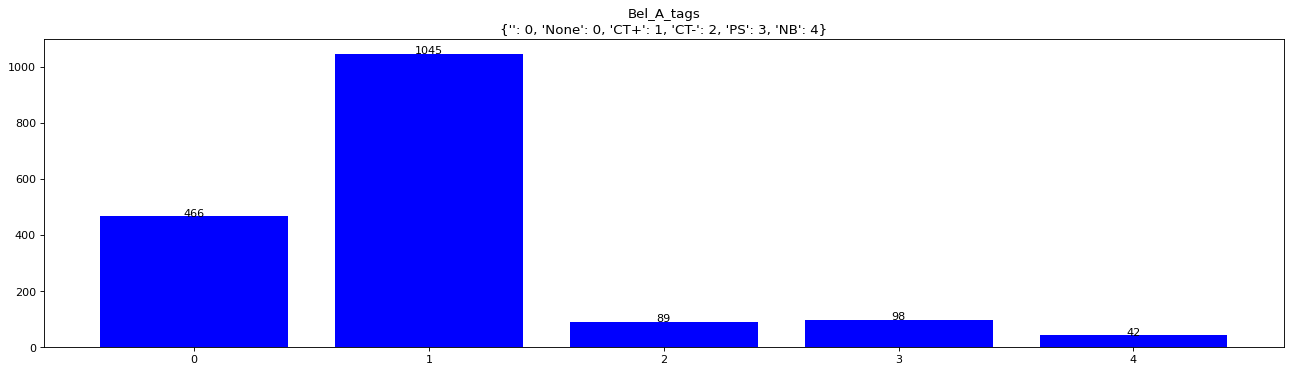

In [ ]:
corpus_visualizer(f"Bel_A_tags\n{mapping_Bel}", Bel_A_tags)

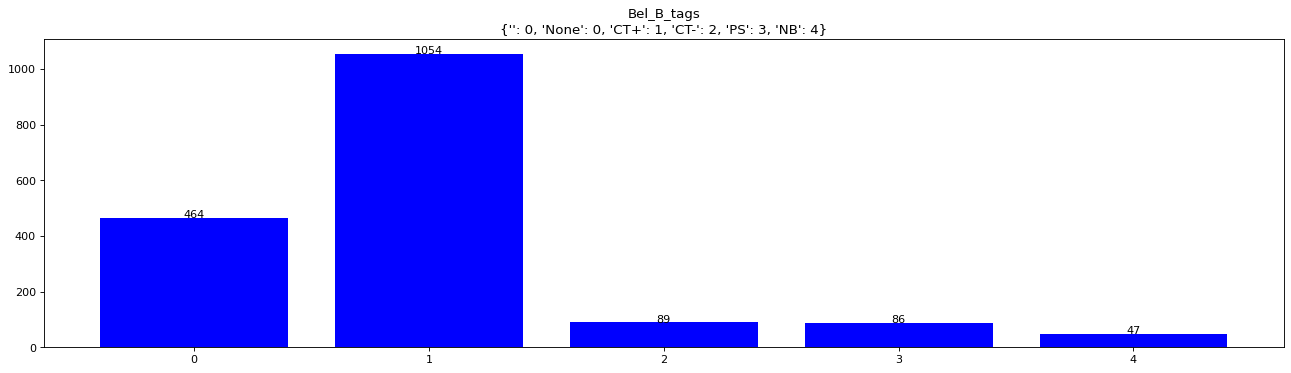

In [ ]:
corpus_visualizer(f"Bel_B_tags\n{mapping_Bel}", Bel_B_tags)

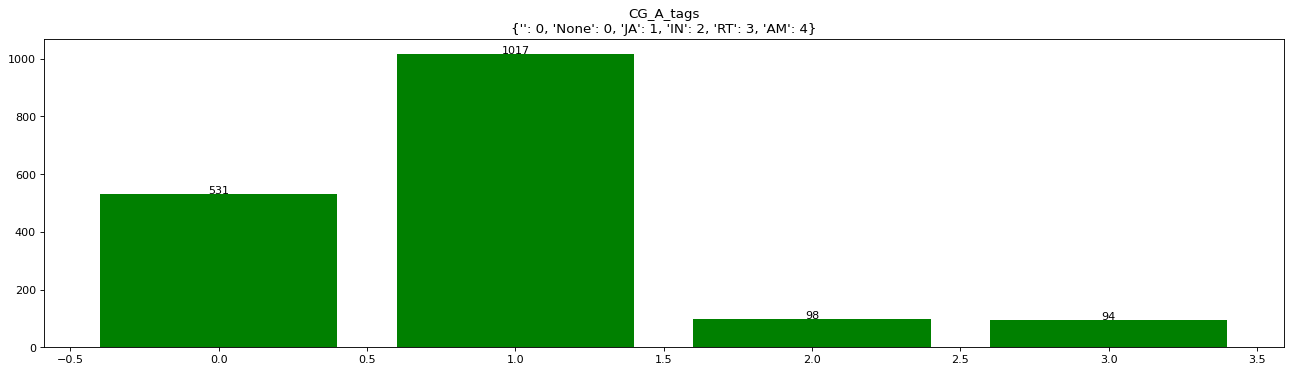

In [ ]:
corpus_visualizer(f"CG_A_tags\n{mapping_CG}", CG_A_tags, color="g")

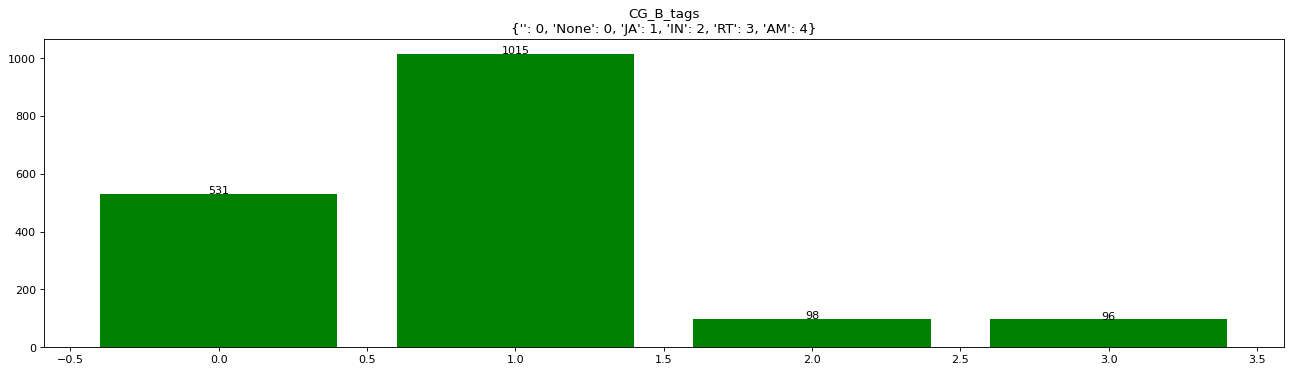

In [ ]:
corpus_visualizer(f"CG_B_tags\n{mapping_CG}", CG_B_tags, color="g")

# Corpus Analysis None Events

In [ ]:
SUM_Event, SUM_Event_None = len(DF['Event']), 0
SUM_Bel_A_0, SUM_Bel_B_0, SUM_Bel_A_0_Bel_B_0 = 0, 0, 0
SUM_Event_None_Bel_A_0, SUM_Event_None_Bel_B_0, SUM_Event_None_Bel_A_0_Bel_B_0 = 0, 0, 0
SUM = 0

for i in range(SUM_Event):
    if DF['Event'][i]=='None': SUM_Event_None += 1
    if DF['Bel(A)'][i]==0: SUM_Bel_A_0 += 1
    if DF['Bel(B)'][i]==0: SUM_Bel_B_0 += 1
    if DF['Bel(A)'][i]==0 and DF['Bel(B)'][i]==0: SUM_Bel_A_0_Bel_B_0 += 1
    if DF['Event'][i]=='None' and DF['Bel(A)'][i]==0: SUM_Event_None_Bel_A_0 += 1
    if DF['Event'][i]=='None' and DF['Bel(B)'][i]==0: SUM_Event_None_Bel_B_0 += 1
    if DF['Event'][i]=='None' and DF['Bel(A)'][i]==0 and DF['Bel(B)'][i]==0: SUM_Event_None_Bel_A_0_Bel_B_0 += 1
    if DF['Event'][i]!='None' and DF['Bel(A)'][i]==0 and DF['Bel(B)'][i]==0: SUM += 1

print("Events number is:", SUM_Event)
print("[Event=None]:", SUM_Event_None)
print("[Bel(A)=0]:", SUM_Bel_A_0)
print("[Bel(B)=0]:", SUM_Bel_B_0)
print("[Bel(A)=0 & Bel(B)=0]:", SUM_Bel_A_0_Bel_B_0)
print("[Event=None & Bel(A)=0]:", SUM_Event_None_Bel_A_0)
print("[Event=None & Bel(B)=0]:", SUM_Event_None_Bel_B_0)
print("[Event=None & Bel(A)=0 & Bel(B)=0]:", SUM_Event_None_Bel_A_0_Bel_B_0)
print("[Event=!None & Bel(A)=0 & Bel(B)=0]:", SUM)

Events number is: 1740
[Event=None]: 455
[Bel(A)=0]: 466
[Bel(B)=0]: 464
[Bel(A)=0 & Bel(B)=0]: 445
[Event=None & Bel(A)=0]: 442
[Event=None & Bel(B)=0]: 440
[Event=None & Bel(A)=0 & Bel(B)=0]: 431
[Event=!None & Bel(A)=0 & Bel(B)=0]: 14


# Event Preprocessing

1. Records that do not have an event for a sentence but have the tag Bel(A) **OR** Bel(B) are placed with the value of the sentence for the event.

In [ ]:
condition = (DF['Sentence']!='None') & (DF['Event']=='None') & ((DF['Bel(A)']!=0) | (DF['Bel(B)']!=0))
subset = DF[condition]
subset

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
68,A: yeah.,42.0,None,0,1,1,1
201,A: The kid sister thing?,125.0,None,1,1,1,1
383,B: %um. yeah I guess.,33.0,None,0,3,1,1
400,B: yeah he is finished.,41.0,None,1,0,1,1
430,A: Excellent,60.0,None,1,1,0,0
519,A: Battery operated deal.,111.0,None,0,2,3,3
710,A: yeah ((I’m still here)) [distortion],217.0,None,1,0,1,1
1026,A: Yes. uh-huh.,152.0,None,0,1,1,1
1214,B: What?,272.0,None,0,2,3,3
1215,B: okay.,273.0,None,0,1,1,1


2. After executing the first step, we delete the records that do not have event and Bel(A) **AND** Bel(B) tags.

In [ ]:
condition = (DF['Sentence']!='None') & (DF['Event']=='None') & (DF['Bel(A)']==0) & (DF['Bel(B)']==0)
subset = DF[condition]
subset

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
3,B: mhm.,2.0,None,0,0,0,0
5,B: mhm.,4.0,None,0,0,0,0
14,B: mhm [distorted],7.0,None,0,0,0,0
15,B: mhm.,8.0,None,0,0,0,0
16,B: mhm.,9.0,None,0,0,0,0
...,...,...,...,...,...,...,...
1680,B: %mm.,184.0,None,0,0,0,0
1684,B: yeah.,187.0,None,0,0,0,0
1685,B: yeah.,188.0,None,0,0,0,0
1706,B: yeah.,195.0,None,0,0,0,0


3. We have events that have not been tagged Bel(A) or Bel(B).

In [ ]:
condition = (DF['Event']!='None') & (DF['Bel(A)']==0) & (DF['Bel(B)']==0)
subset = DF[condition]
subset

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
420,A: Maybe early June.,53.0,Kevin and A won't move till maybe early June,0,0,0,0
479,A: Don’t we did one time we were like we were ...,89.1,Kevin and A were travlleing in he car,0,0,0,0
534,A: {inhale} Don’t ever do that again.,123.0,A won't use the battery operated pump again,0,0,0,0
557,A: if y- if it was a choice in your life to sa...,140.0,(If using the pump was a choice in one's life),0,0,0,0
650,None,190.4,A was pumping too much,0,0,0,0
1159,B: No. th- {laugh},238.0,B laughs at A's swearing at the lawyer,0,0,0,0
1160,A: And %um {laugh},239.0,A laughs about swearing at the lawyer,0,0,0,0
1191,None,258.3,The lawyer's partner is not even an adoption a...,0,0,0,0
1287,A: birds and colors. And also in parts of &Sp...,312.1,In parts of Spain people have wide streets wit...,0,0,0,0
1288,None,312.2,A doesn't know if people have wide streets wit...,0,0,0,0


### data cleaning

In [ ]:
clean_DF = DF.copy()

for i in range(len(DF['Event'])):
    if DF['Sentence'][i]!='None' and DF['Event'][i]=='None' and ( DF['Bel(A)'][i]!=0 or DF['Bel(B)'][i]!=0 ):
        clean_DF['Event'][i] = DF['Sentence'][i].replace(":", " says")

<ipython-input-30-8b024f2b7960>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_DF['Event'][i] = DF['Sentence'][i].replace(":", " says")


In [ ]:
clean_DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",1,1,1,1
1,None,1.2,The company solicits,1,1,2,2
2,None,1.3,The company is trying to solicit more througho...,1,1,1,1
3,B: mhm.,2.0,None,0,0,0,0
4,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,1,1,1,1
...,...,...,...,...,...,...,...
1735,None,208.3,A's sons never treat one another like A and B'...,3,3,1,1
1736,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,1,1,1,1
1737,None,209.2,B's kids will be like A and B's mom and dad,3,3,1,1
1738,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,1,1,1,1


In [ ]:
condition = (clean_DF['Bel(A)']==0) & (clean_DF['Bel(B)']==0)
clean_DF = clean_DF[~condition]
clean_DF.index = [x for x in range(0, len(clean_DF.values))]
clean_DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",1,1,1,1
1,None,1.2,The company solicits,1,1,2,2
2,None,1.3,The company is trying to solicit more througho...,1,1,1,1
3,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,1,1,1,1
4,A: And I teach probably two classes and then d...,5.1,A teaches two classes,1,1,1,1
...,...,...,...,...,...,...,...
1290,None,208.3,A's sons never treat one another like A and B'...,3,3,1,1
1291,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,1,1,1,1
1292,None,209.2,B's kids will be like A and B's mom and dad,3,3,1,1
1293,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,1,1,1,1


# Clean Corpus visualization

In [ ]:
Bel_A_tags, Bel_B_tags, CG_A_tags, CG_B_tags = {}, {}, {}, {}

for i in range(len(clean_DF['Bel(A)'])):
    tag = clean_DF['Bel(A)'][i]
    if tag not in Bel_A_tags.keys(): Bel_A_tags[tag]=0
    if tag in Bel_A_tags.keys(): Bel_A_tags[tag]+=1

    tag = clean_DF['Bel(B)'][i]
    if tag not in Bel_B_tags.keys(): Bel_B_tags[tag]=0
    if tag in Bel_B_tags.keys(): Bel_B_tags[tag]+=1

    tag = clean_DF['CG(A)'][i]
    if tag not in CG_A_tags.keys(): CG_A_tags[tag]=0
    if tag in CG_A_tags.keys(): CG_A_tags[tag]+=1

    tag = clean_DF['CG(B)'][i]
    if tag not in CG_B_tags.keys(): CG_B_tags[tag]=0
    if tag in CG_B_tags.keys(): CG_B_tags[tag]+=1


In [ ]:
Bel_A_tags = dict(sorted(Bel_A_tags.items()))
Bel_B_tags = dict(sorted(Bel_B_tags.items()))
CG_A_tags = dict(sorted(CG_A_tags.items()))
CG_B_tags = dict(sorted(CG_B_tags.items()))

In [ ]:
print("Bel_A_tags: ", Bel_A_tags)
print("Bel_B_tags: ", Bel_B_tags)
print("CG_A_tags: ", CG_A_tags)
print("CG_B_tags: ", CG_B_tags)

Bel_A_tags:  {0: 21, 1: 1045, 2: 89, 3: 98, 4: 42}
Bel_B_tags:  {0: 19, 1: 1054, 2: 89, 3: 86, 4: 47}
CG_A_tags:  {0: 95, 1: 1016, 2: 91, 3: 93}
CG_B_tags:  {0: 95, 1: 1014, 2: 91, 3: 95}


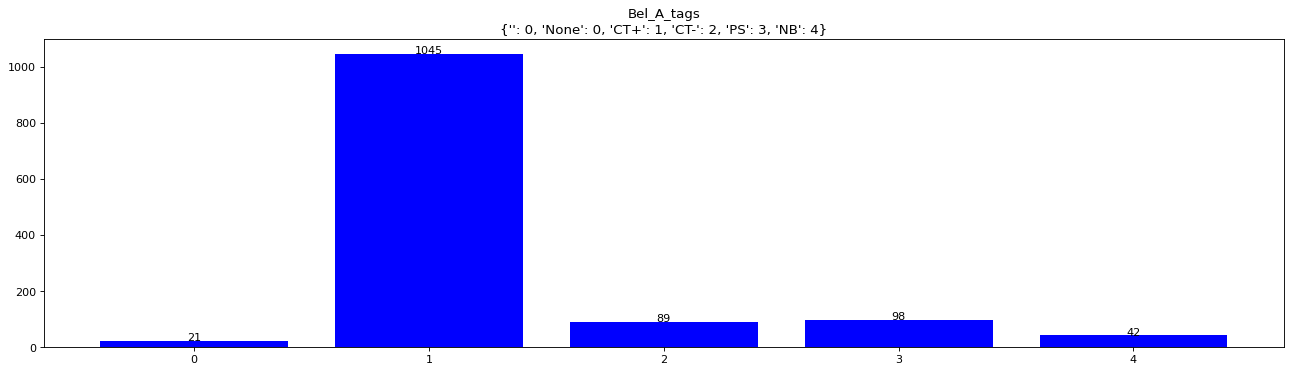

In [ ]:
corpus_visualizer(f"Bel_A_tags\n{mapping_Bel}", Bel_A_tags)

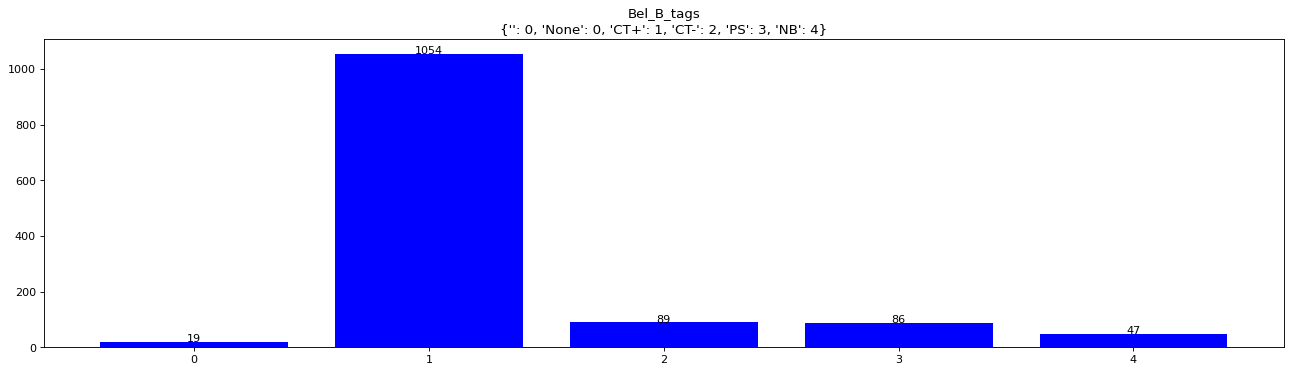

In [ ]:
corpus_visualizer(f"Bel_B_tags\n{mapping_Bel}", Bel_B_tags)

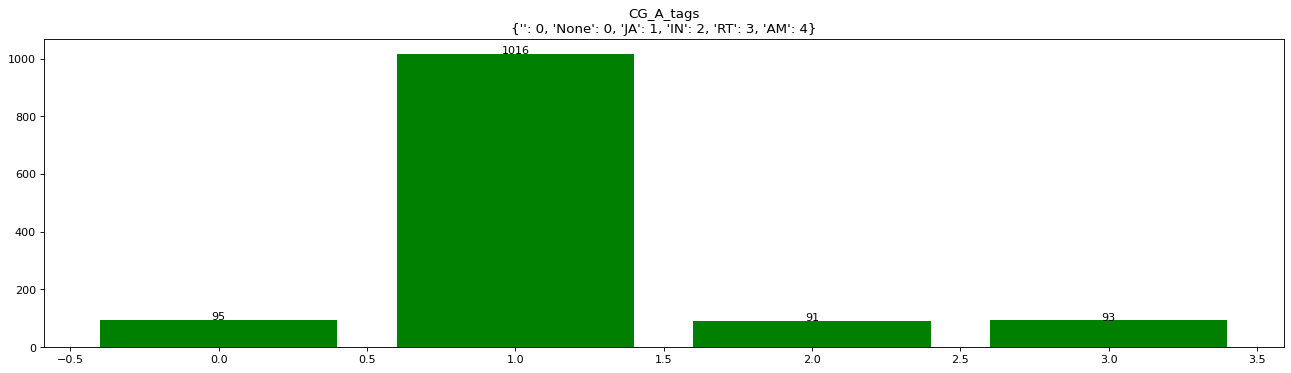

In [ ]:
corpus_visualizer(f"CG_A_tags\n{mapping_CG}", CG_A_tags, color="g")

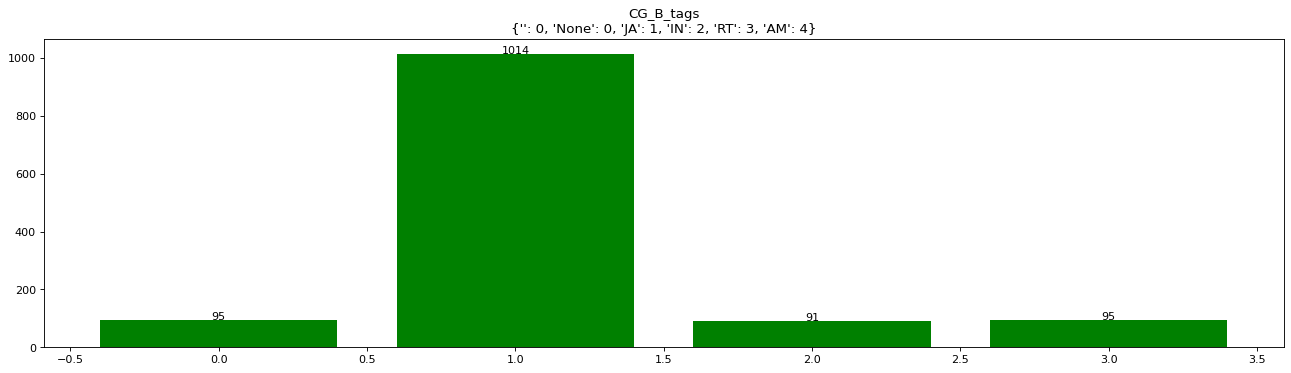

In [ ]:
corpus_visualizer(f"CG_B_tags\n{mapping_CG}", CG_B_tags, color="g")

# Make memory and save context

In [ ]:
list1 = ["salam", '123']
list1.reverse()
list1

['123', 'salam']

In [ ]:
context_length = 2

In [ ]:
events_dict = {'Utterance': [], 'Sentence': [], 'Events': [], 'Eno.': []}

i = 0
while i < len(clean_DF['Event']):
    events_of_sentence = ""
    sentence = clean_DF['Sentence'].get(i)
    if sentence != "None": # new sentence
        point=i
        event_number = 1
        events_of_sentence += f"Event{event_number}: " + clean_DF['Event'].get(i) + "\n"
        i+=1
        while clean_DF['Sentence'].get(i) == 'None':
            event_number+=1
            events_of_sentence += f"Event{event_number}: " + clean_DF['Event'].get(i) + "\n"
            i+=1

        context_of_utterance = []
        selected = 0
        while context_length!=selected and point>0 and (clean_DF['Eno.'].get(point))>=int(clean_DF['Eno.'].get(point-1)):
          point -= 1
          utterance = clean_DF['Sentence'].get(point)
          if utterance != "None":
            context_of_utterance.append(utterance)
            selected+=1

        context_of_utterance.reverse()
        context = "Context:\n"
        utterance_number=1
        for utterance in context_of_utterance:
          context += f"utterance{utterance_number}: {utterance}\n"
          utterance_number+=1

    events_dict['Utterance'].append(sentence)
    events_dict['Sentence'].append(f"{sentence}\n{context}")
    events_dict['Events'].append(events_of_sentence)
    events_dict['Eno.'].append(clean_DF['Eno.'].get(i-1))

In [ ]:
events_dict_df = pd.DataFrame.from_dict(events_dict)
events_dict_df

,Utterance,Sentence,Events,Eno.
0,"A: %um but although they solicit, they’re tryi...","A: %um but although they solicit, they’re tryi...","Event1: Although the company solicits, the com...",1.3
1,A: although they’ve had most interest in &Japa...,A: although they’ve had most interest in &Japa...,Event1: The company have had most interest in ...,3.0
2,A: And I teach probably two classes and then d...,A: And I teach probably two classes and then d...,Event1: A teaches two classes\nEvent2: A does ...,5.4
3,A: or to go look at companies dealing with cer...,A: or to go look at companies dealing with cer...,Event1: A does administrative work to go look ...,6.4
4,A: So it’s really groovy because I ((mean)) I ...,A: So it’s really groovy because I ((mean)) I ...,Event1: A does administrative work to make con...,12.4
...,...,...,...,...
557,B: What?,B: What? \nContext:\nutterance1: B: I don’t kn...,Event1: B doesn't know what A said to A and B'...,207.0
558,"A: I said I hope that my, my sons never treat ...","A: I said I hope that my, my sons never treat ...",Event1: A said A hopes that A's sons never tre...,208.3
559,B: True. I don’t think my kids will be that wa...,B: True. I don’t think my kids will be that wa...,Event1: B doesn't think B's kids will be like ...,209.2
560,A: And he just looked at me. [channel noise],A: And he just looked at me. [channel noise] \...,Event1: A and B's dad just looked at A\n,210.0


In [ ]:
events_dict_df.to_csv("Event_Generation_Corpus.csv")

In [ ]:
len(events_dict['Sentence'])

562

In [ ]:
train_set, test_set = {'Utterance': [], 'Sentence': [], 'Events': []}, {'Utterance': [], 'Sentence': [], 'Events': []}

training_conversation = 3
for i in range(len(events_dict['Sentence'])-1):
  if training_conversation>0:
    train_set['Utterance'].append(events_dict['Utterance'][i])
    train_set['Sentence'].append(events_dict['Sentence'][i])
    train_set['Events'].append(events_dict['Events'][i])

  if training_conversation==0:
    test_set['Utterance'].append(events_dict['Utterance'][i])
    test_set['Sentence'].append(events_dict['Sentence'][i])
    test_set['Events'].append(events_dict['Events'][i])

  if int(events_dict['Eno.'][i]) > int(events_dict['Eno.'][i+1]): training_conversation -= 1 # new conversation

# Train Test Split

In [ ]:
from datasets import Dataset, DatasetDict

train_set, test_set = Dataset.from_dict(train_set), Dataset.from_dict(test_set)

dataset = DatasetDict(
    {
        "train": train_set,
        "test": test_set
    }
)

In [ ]:
dataset["train"][10]

{'Utterance': 'A: You don’t have to tell them about (( )) or anything. {breath} oh weird.  ',
 'Sentence': 'A: You don’t have to tell them about (( )) or anything. {breath} oh weird.  \nContext:\nutterance1: A: I taught listening. I taught integrated skills and g- beginning grammar.  \nutterance2: B: mhm. I’m just writing this down so I \n',
 'Events': 'Event1: B does not have to tell them (?) about what A is teaching or anything\n'}

In [ ]:
dataset["test"][20]

{'Utterance': 'B: You know I was gone ',
 'Sentence': 'B: You know I was gone \nContext:\nutterance1: A: Do you? {laugh} \nutterance2: A: Go get them.  \n',
 'Events': 'Event1: A knows B was gone\nEvent2: B was gone\n'}

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Utterance', 'Sentence', 'Events'],
        num_rows: 415
    })
    test: Dataset({
        features: ['Utterance', 'Sentence', 'Events'],
        num_rows: 146
    })
})

In [ ]:
for record in dataset['test']:
  print(record['Utterance'])
  print(record['Sentence'])
  print(record['Events'])
  print("--------------------------")

B: %um I took them to %uh &Jill’s and they spent two days there and I guess she couldn’t take them and their mom and dad came.  
B: %um I took them to %uh &Jill’s and they spent two days there and I guess she couldn’t take them and their mom and dad came.  
Context:

Event1: B took the kids to Jill's
Event2: The kids spent two days at Jill's
Event3: B guesses Jill couldn't take the kids
Event4: Jill couldn't take the kids
Event5: The kid's mom and dad came

--------------------------
A: You mean at te- in &Texas? 
A: You mean at te- in &Texas? 
Context:
utterance1: B: %um I took them to %uh &Jill’s and they spent two days there and I guess she couldn’t take them and their mom and dad came.  

Event1: A asks B if B took the kids to Texas
Event2: B took the kids to Texas

--------------------------
B: yeah.  
B: yeah.  
Context:
utterance1: B: %um I took them to %uh &Jill’s and they spent two days there and I guess she couldn’t take them and their mom and dad came.  
utterance2: A: You m

### save and serialize corpus

In [ ]:
import pickle

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/event_extraction_3to1_2previous.dat", "wb")
pickle.dump(dataset, f)
f.close()

### load corpus

In [ ]:
import pickle

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/event_extraction_3to1_2previous.dat", "rb")
dataset = pickle.load(f)
f.close()

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Utterance', 'Sentence', 'Events'],
        num_rows: 415
    })
    test: Dataset({
        features: ['Utterance', 'Sentence', 'Events'],
        num_rows: 146
    })
})

In [ ]:
clean_DF.to_csv('corpus.csv')